<a href="https://colab.research.google.com/github/ffalo64/rabbit_challenge/blob/main/2_9_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モジュールのロード

In [1]:
import tensorflow as tf
import numpy as np

# データのロード

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [3]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

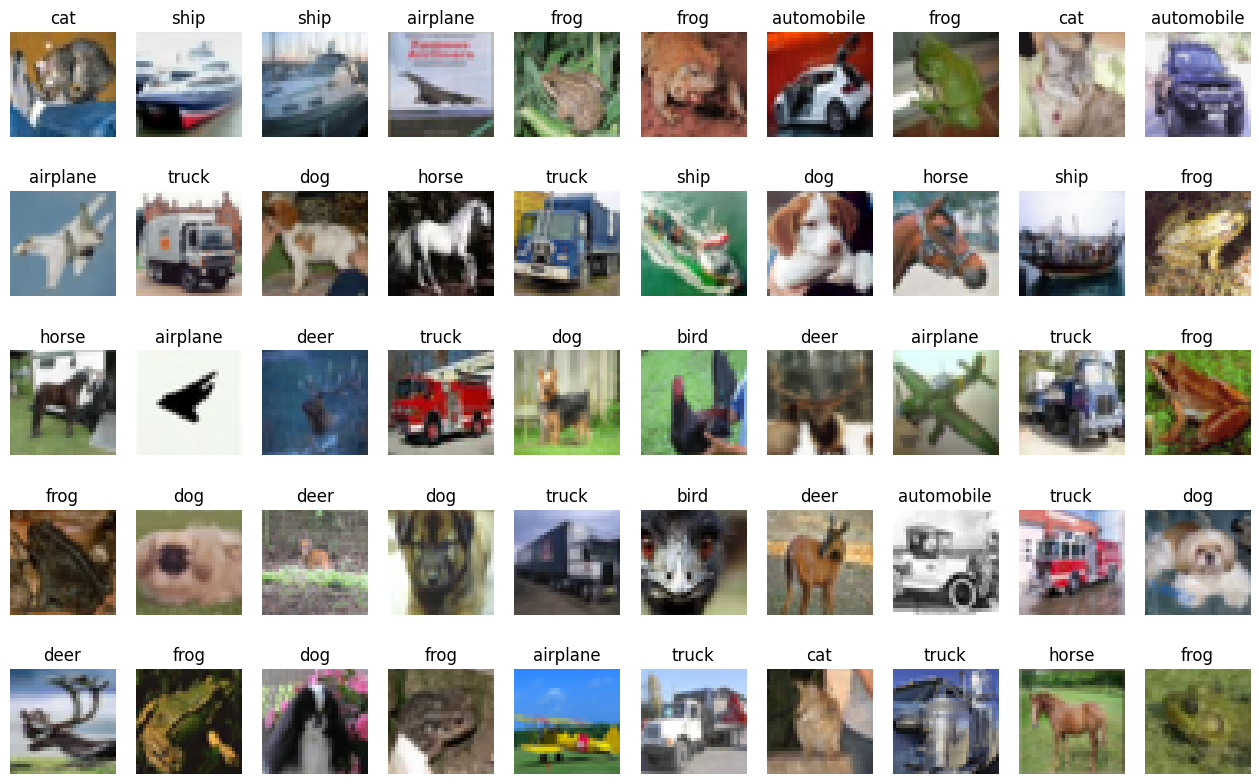

In [4]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

# ベースモデルでの実行(正則化なし)

In [5]:
epochs = 5
batch_size = 256

In [6]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [7]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [8]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 14s 16ms/step - loss: 1.5829 - acc: 0.4379 - val_loss: 1.3148 - val_acc: 0.5286
Epoch 2/5
196/196 [==============================] - 2s 12ms/step - loss: 1.1550 - acc: 0.5916 - val_loss: 1.1474 - val_acc: 0.5943
Epoch 3/5
196/196 [==============================] - 2s 12ms/step - loss: 0.9810 - acc: 0.6580 - val_loss: 1.0003 - val_acc: 0.6519
Epoch 4/5
196/196 [==============================] - 3s 13ms/step - loss: 0.8618 - acc: 0.7016 - val_loss: 0.9654 - val_acc: 0.6686
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.7582 - acc: 0.7366 - val_loss: 0.9389 - val_acc: 0.6777


# 正則化あり

## L1正則化の実行例

出力直前の全結合層においてL1正則化を適用した場合の例です。

In [9]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.L1(0.01)),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [10]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [11]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 5s 17ms/step - loss: 2.0034 - acc: 0.3041 - val_loss: 1.7057 - val_acc: 0.4293
Epoch 2/5
196/196 [==============================] - 2s 13ms/step - loss: 1.5723 - acc: 0.4787 - val_loss: 1.4833 - val_acc: 0.5107
Epoch 3/5
196/196 [==============================] - 3s 13ms/step - loss: 1.3997 - acc: 0.5420 - val_loss: 1.3803 - val_acc: 0.5456
Epoch 4/5
196/196 [==============================] - 3s 13ms/step - loss: 1.2917 - acc: 0.5792 - val_loss: 1.3191 - val_acc: 0.5731
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 1.1958 - acc: 0.6142 - val_loss: 1.2217 - val_acc: 0.6045


## L2正則化の実行例

出力直前の全結合層においてL2正則化を適用した場合の例です。

In [12]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [13]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               3686912   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                      

In [14]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 5s 16ms/step - loss: 1.7028 - acc: 0.4397 - val_loss: 1.3870 - val_acc: 0.5562
Epoch 2/5
196/196 [==============================] - 3s 17ms/step - loss: 1.2382 - acc: 0.6099 - val_loss: 1.2253 - val_acc: 0.6116
Epoch 3/5
196/196 [==============================] - 5s 25ms/step - loss: 1.0272 - acc: 0.6846 - val_loss: 1.0590 - val_acc: 0.6684
Epoch 4/5
196/196 [==============================] - 4s 18ms/step - loss: 0.8810 - acc: 0.7361 - val_loss: 1.0482 - val_acc: 0.6641
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.7550 - acc: 0.7870 - val_loss: 0.9852 - val_acc: 0.6890


## Elasti Netの実行例

In [15]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.L1L2(0.01)),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [16]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               3686912   
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                      

In [17]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 5s 17ms/step - loss: 1.8042 - acc: 0.4148 - val_loss: 1.4913 - val_acc: 0.5350
Epoch 2/5
196/196 [==============================] - 3s 13ms/step - loss: 1.3794 - acc: 0.5758 - val_loss: 1.2827 - val_acc: 0.6069
Epoch 3/5
196/196 [==============================] - 3s 15ms/step - loss: 1.1902 - acc: 0.6400 - val_loss: 1.1859 - val_acc: 0.6272
Epoch 4/5
196/196 [==============================] - 3s 13ms/step - loss: 1.0570 - acc: 0.6863 - val_loss: 1.1152 - val_acc: 0.6569
Epoch 5/5
196/196 [==============================] - 3s 13ms/step - loss: 0.9610 - acc: 0.7182 - val_loss: 1.0926 - val_acc: 0.6663


# 各正則化手法の比較

L1、L2、ElastiNetをぞれぞれ適用した場合の比較です。

In [18]:
def create_model(input_shape, class_num, regularization_method, regularization_method_weight=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu',
                              activity_regularizer=regularization_method(regularization_method_weight)) if regularization_method else tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [19]:
epochs = 10
batch_size = 256

regularizers = [
                None,
                tf.keras.regularizers.L1,
                tf.keras.regularizers.L2,
                tf.keras.regularizers.L1L2
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for regularizer in regularizers:
    model = create_model(x_train.shape, 10, regularizer)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 5s 17ms/step - loss: 1.5184 - acc: 0.4600 - val_loss: 1.2820 - val_acc: 0.5468
Epoch 2/10
196/196 [==============================] - 3s 14ms/step - loss: 1.1354 - acc: 0.6021 - val_loss: 1.0753 - val_acc: 0.6288
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 0.9626 - acc: 0.6634 - val_loss: 1.0011 - val_acc: 0.6515
Epoch 4/10
196/196 [==============================] - 3s 15ms/step - loss: 0.8422 - acc: 0.7090 - val_loss: 0.9452 - val_acc: 0.6694
Epoch 5/10
196/196 [==============================] - 3s 14ms/step - loss: 0.7176 - acc: 0.7521 - val_loss: 0.9222 - val_acc: 0.6786
Epoch 6/10
196/196 [==============================] - 2s 13ms/step - loss: 0.6084 - acc: 0.7929 - val_loss: 0.9020 - val_acc: 0.6943
Epoch 7/10
196/196 [==============================] - 3s 13ms/step - loss: 0.4912 - acc: 0.8340 - val_loss: 0.9742 - val_acc: 0.6864
Epoch 8/10
196/196 [==============================] - 3s 14ms/step - 

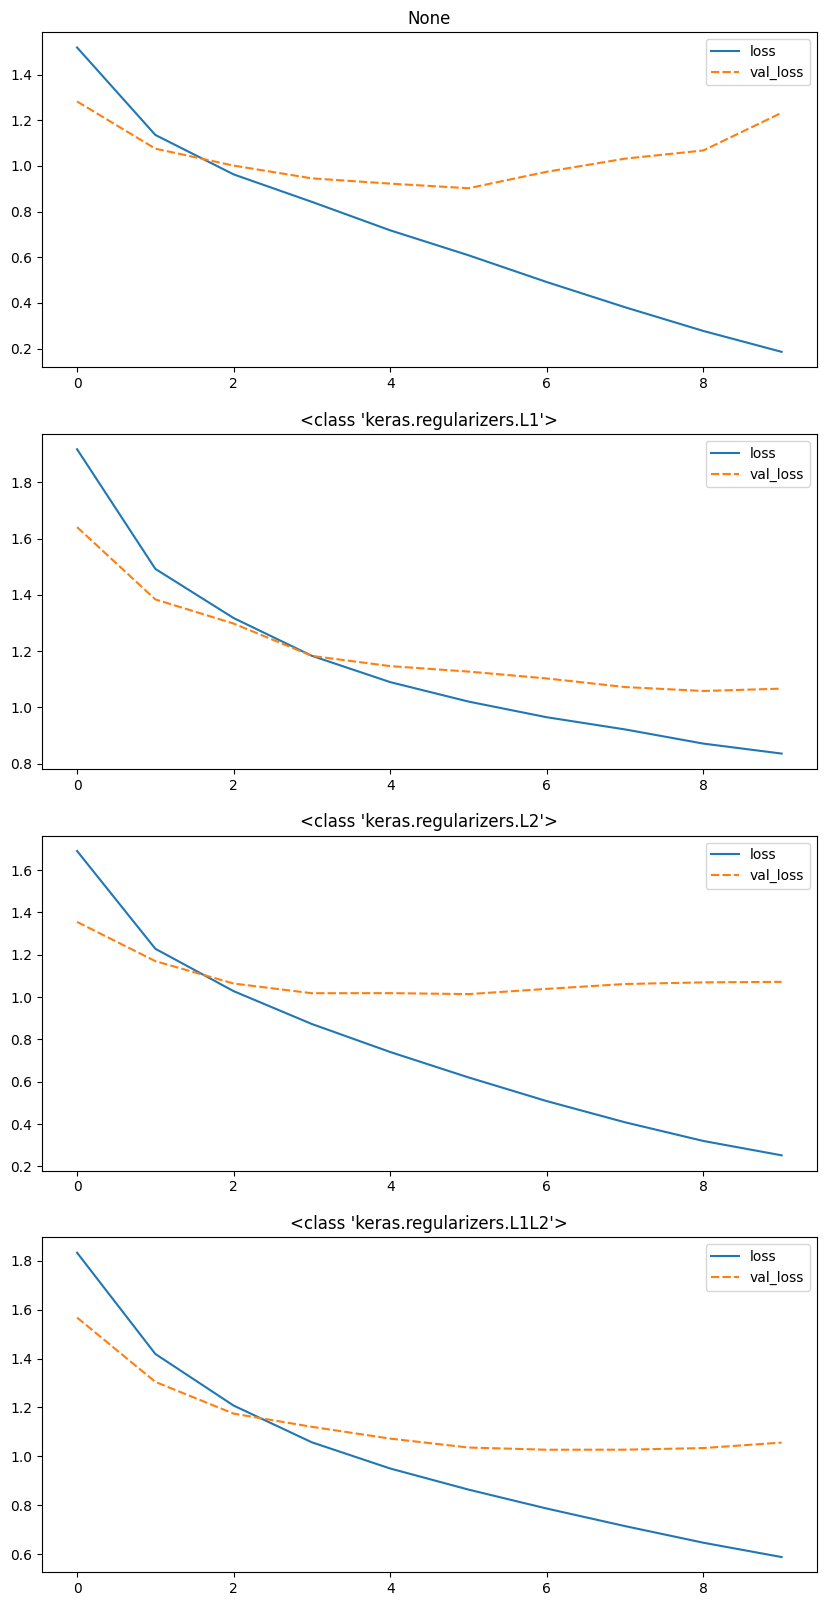

In [20]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    regularizer_name = str(regularizers[i])
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(regularizer_name)